# Structures, Brillouin zones, and cut-planning

In [1]:
# Import packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import peaks as pks
import os
import pint_xarray

# Set default options
xr.set_options(cmap_sequential='Purples', keep_attrs=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Example data
from peaks.core.utils.sample_data import ExampleData

## Loading structures
Handling structures and Brillouin zone plotting requires the `ase` package. This can be installed via `pip install ase` or optionally by specifying the `all` flag when installing `peaks`.

In [2]:
# Import some core ase functions (note, if just using the basic `peaks`` functions, this is not required)
import ase
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.build import make_supercell

Passing a `.cif` file to the main `pks.load` function will load an `atoms.Atoms` object via `ase.io.read`. The full suite of `ase` utilities can then be used, e.g., to plot and visualise this structure. A couple of simple examples are shown below; see the [ase documentation](https://wiki.fysik.dtu.dk/ase/).

In [3]:
atoms = ExampleData.structure

In [4]:
atoms

Atoms(symbols='Pd3Co3O6', pbc=True, cell=[[2.845, 0.0, 0.0], [-1.4224999999999994, 2.4638422737667285, 0.0], [0.0, 0.0, 17.88]], spacegroup_kinds=...)

In [5]:
# Interactive view of the sturcture
# view(atoms)  # Uncomment to run - opens in pop-up window

<Popen: returncode: None args: ['/Users/pdk6/miniconda3/envs/peaks-dev/bin/p...>

<Axes: >

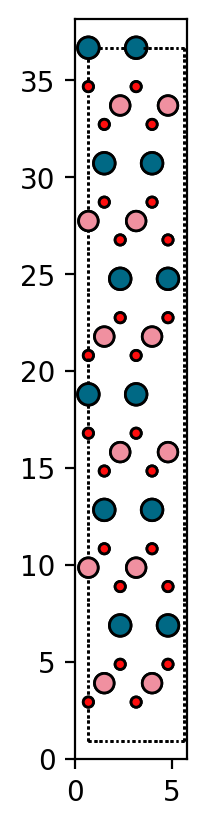

In [6]:
# Make a supercell and plot it
scell = make_supercell(atoms, [[2, 0, 0], [0, 2, 0], [0, 0, 2]])
plot_atoms(scell, radii=0.4, rotation='90x,90y,0z')

## Brillouin zone plotting
`peaks` implements a wrapper around `ase.lattice.plot_bz`, with scaling and configurations optimised for ARPES, and some helper methods (e.g. selecting specific surface orientations, rotating the BZ to align with measured axes etc.) built in.

In [7]:
from peaks.bz.plotting import plot_bz

The atoms object from a loaded `.cif` structure file can be passed directly, or a strucure built using standard `ase` methods. Alternatively, an `ase.lattice.BravaisLattice` object can be passed: 

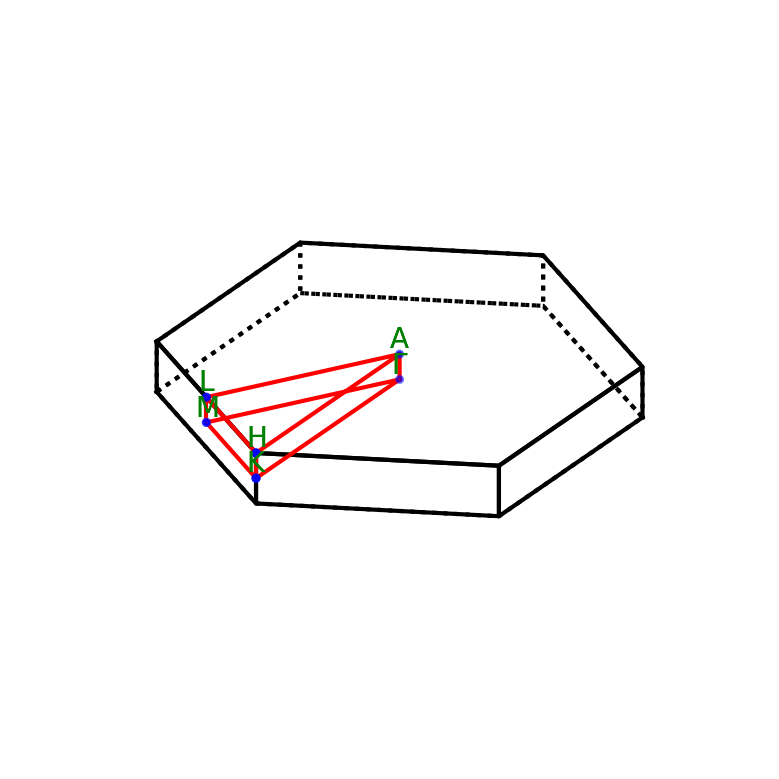

In [8]:
plot_bz(atoms, path=None)

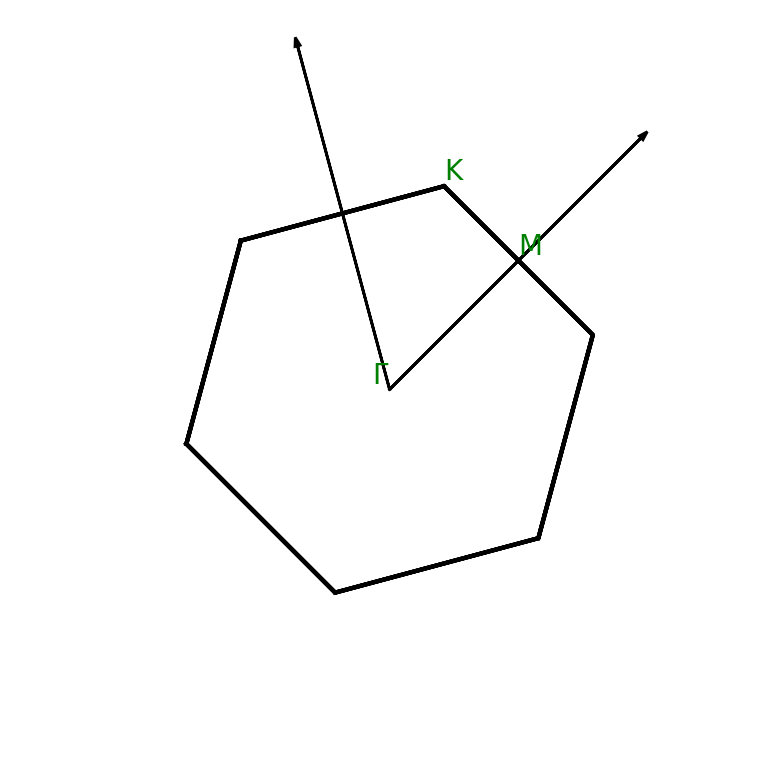

In [9]:
# Build a MoS2 example structure:
MoS2 = ase.build.mx2(formula='MoS2', a=3.5, size=(1, 1, 1), vacuum=None)
plot_bz(MoS2, vectors=True, rotate=15)

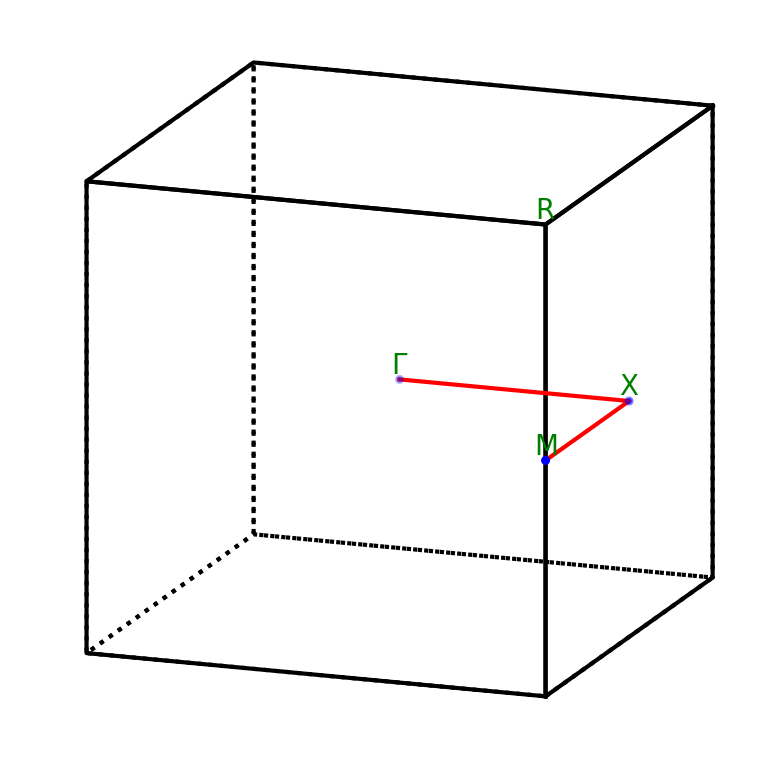

In [10]:
# Make a generic lattice
lattice = ase.lattice.CUB(a=3.8)
plot_bz(lattice, path='GXM', azim=20, elev=15)

You can pass a surface orientation to plot the corresponding surface Brillouin zone, repeating as desired

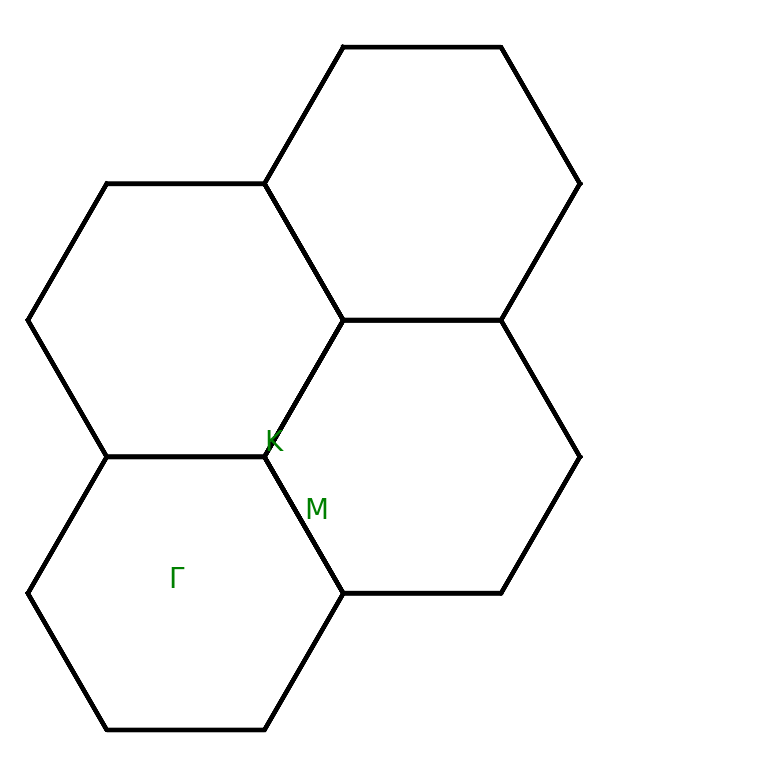

In [11]:
plot_bz(lattice, surface=(1,1,1), repeat=(2,2))

Plot on top of data by passing the relevant `matplotlib` axis

In [12]:
FS = ExampleData.FS
FS.metadata.set_normal_emission({'polar': '1.5 deg', 'tilt': '-0.08399999999999999 deg', 'azi': '-12.510000138999999 deg'})

i05-59818.nxs:   0%|          | 0.00/107M [00:00<?, ?B/s]

[########################################] | 100% Completed | 5.26 s


In [13]:
FSk = FS.k_convert(eV_slice=(-0.05,0.02))

Converting data to k-space - initialising:   0%|          | 0/3 [00:00<?, ?it/s]

<div class="alert alert-block alert-warning"><b>Analysis warning: </b> EF_correction set from automatic estimation of Fermi level to: 105.066 eV. NB may not be accurate. </div>

Interpolating onto new grid:   0%|                 | 0/26000000 [00:00<?, ?it/s]

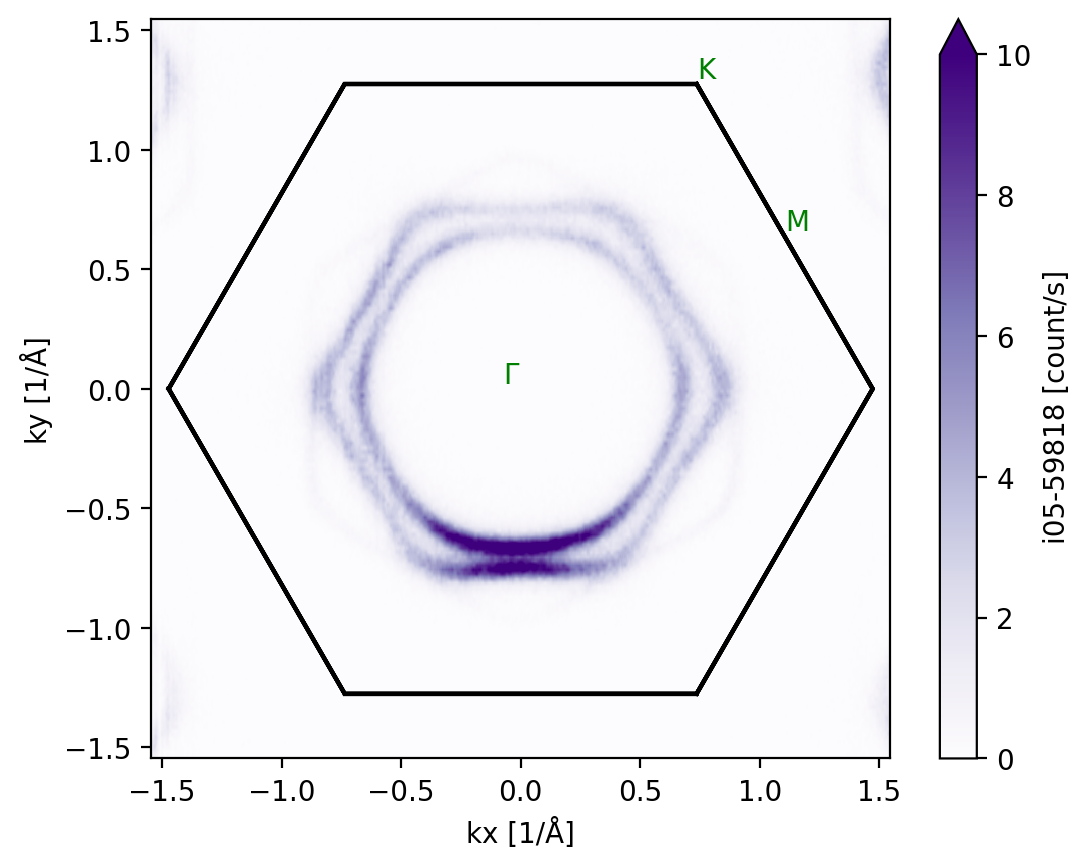

In [14]:
FSk.plot(vmax=10)
ax = plt.gca()
plot_bz(atoms, surface=(0,0,1), ax=ax)

## Brillouin zone sections
The section through multiple Brillouin zones within a given plane can be plotted:

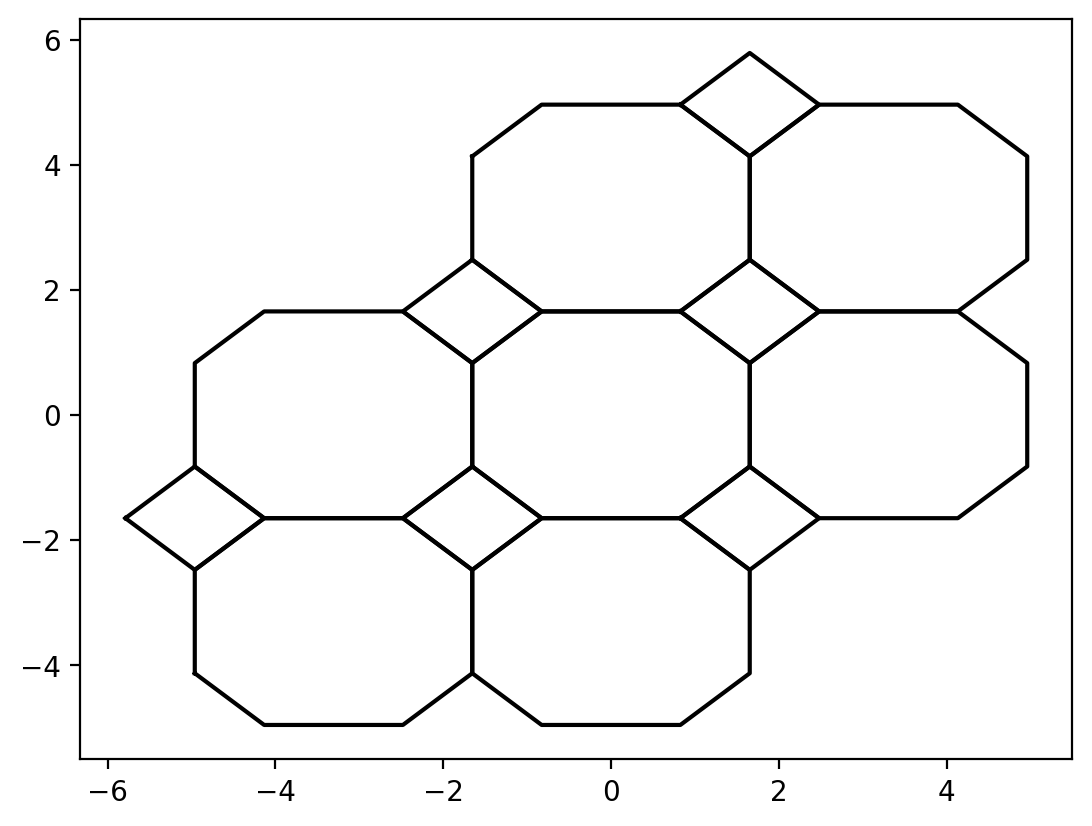

In [15]:
from peaks.bz.plotting import plot_bz_section

FCC = ase.lattice.FCC(a=3.8)
plot_bz_section(FCC, plane_normal=(0,0,1), plane_origin=(0,0,0), show=True)

## k-points
`sym_points` provides a quick view of the $k$ values (in $\AA^{-1}$) of high symmetry points, and optionally the angle required to get to these if measuring along the slit at a specified photon energy 

In [16]:
from peaks.bz.utils import sym_points
sym_points(atoms, surface=(0,0,1), hv=21.2)

,k_x,k_y,k_z,|k|,angle_along_slit @ 21.2 eV
G,0.000000,0.000000,0.0,0.000000,0.0
M,1.104250,0.637539,0.0,1.275079,37.5
K,0.736167,1.275079,0.0,1.472334,44.7


The methods `plot_kpar_cut` and `plot_kz_cut` can be used to append the relevant slices that will be measured to the BZ.

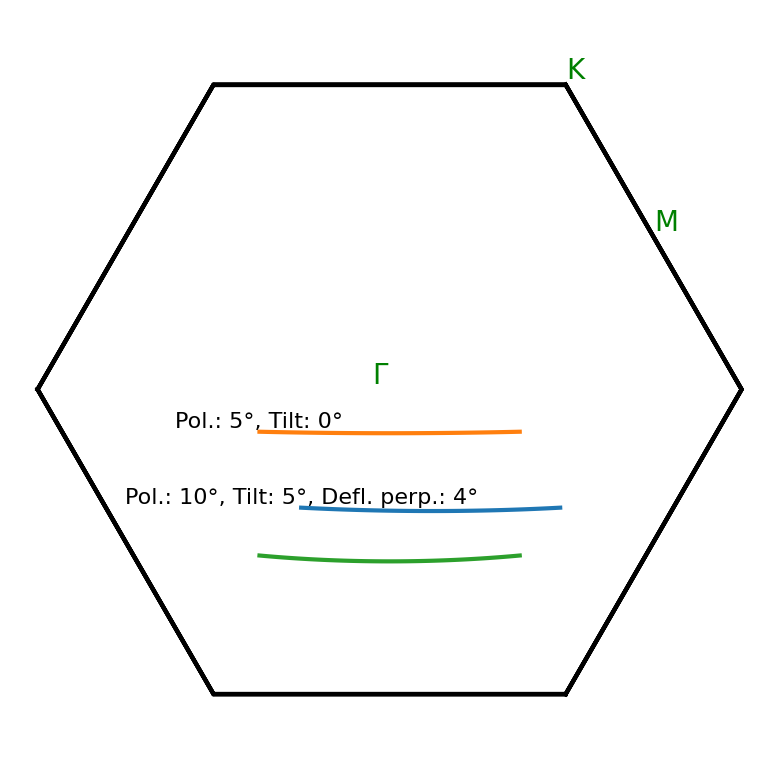

In [17]:
plot_bz(atoms, surface=(0,0,1))
ax = plt.gca()
pks.plot_kpar_cut(polar=10, defl_perp=4, tilt=5, ax=ax)
pks.plot_kpar_cut(polar=5, ax=ax)
pks.plot_kpar_cut(polar=20, ax=ax, label_cut=False)

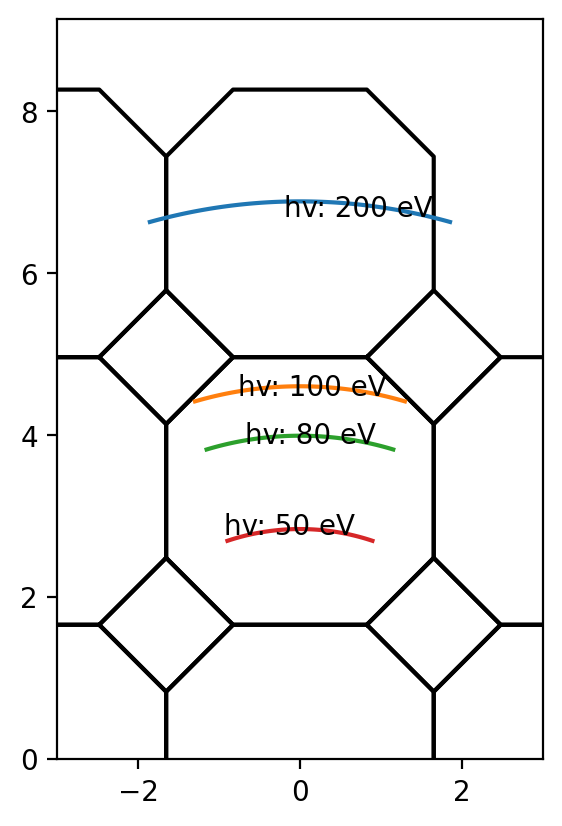

In [18]:
plot_bz_section(FCC, plane_normal=(1,0,0), plane_origin=(0,0,0), repeat=2)
ax=plt.gca()
ax.set_xlim(-3,3)
ax.set_ylim(0,None)
ax.set_aspect('equal')
pks.plot_kz_cut(hv=200, V0=15, ax=ax)
pks.plot_kz_cut(hv=100, V0=15, ax=ax)
pks.plot_kz_cut(hv=80, V0=15, ax=ax)
pks.plot_kz_cut(hv=50, V0=15, ax=ax)